<a href="https://colab.research.google.com/github/TraoAnTan/AI/blob/main/AI_W5_10_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=bc933a1ae8dad6339bd7b648c6aa97b41965d2ed7b8351f8dcd41eef427e6cbc
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


18.923766816143488


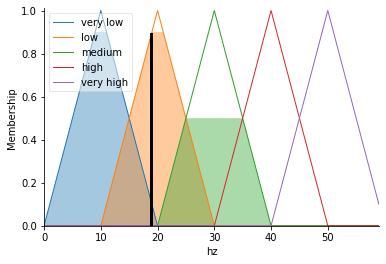

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


setpoint= ctrl.Antecedent(np.arange(18,27,1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(0,40,1), 'sensor')
hz = ctrl.Consequent(np.arange(0,60,1),'hz')

setpoint['very low'] = fuzz.trimf(setpoint.universe, [18,18,20])
setpoint['low'] = fuzz.trimf(setpoint.universe, [18,20,22])
setpoint['medium'] = fuzz.trimf(setpoint.universe, [20,22,24])
setpoint['medium good'] = fuzz.trimf(setpoint.universe, [22,24,26])
setpoint['high'] = fuzz.trimf(setpoint.universe, [24,25,26])
setpoint['very high'] = fuzz.trimf(setpoint.universe, [24,25,27])

# setpoint.view()
sensor['very low'] = fuzz.trimf(sensor.universe,[0,5,10])
sensor['low'] = fuzz.trimf(sensor.universe,[5,10,15])
sensor['medium'] = fuzz.trimf(sensor.universe,[10,15,20])
sensor['medium good'] = fuzz.trimf(sensor.universe,[15,20,25])
sensor['high'] = fuzz.trimf(sensor.universe,[20,25,30])
sensor['very high'] = fuzz.trimf(sensor.universe,[25,35,40])

# sensor.view()

hz['very low'] =fuzz.trimf(hz.universe,[0,10,20])
hz['low'] =fuzz.trimf(hz.universe,[10,20,30])
hz['medium'] =fuzz.trimf(hz.universe,[20,30,40])
hz['high'] =fuzz.trimf(hz.universe,[30,40,50])
hz['very high'] =fuzz.trimf(hz.universe,[40,50,60])

# hz.view()
rule1 =ctrl.Rule(setpoint['very low']& sensor['very low'],hz['very low']) 
rule2 =ctrl.Rule(setpoint['very low']& sensor['low'],hz['very low'])
rule3 =ctrl.Rule(setpoint['very low']& sensor['medium'],hz['very low'])  
rule4 =ctrl.Rule(setpoint['very low']& sensor['medium good'],hz['low']) 
rule5 =ctrl.Rule(setpoint['very low']& sensor['high'],hz['very high']) 
rule6 =ctrl.Rule(setpoint['very low']& sensor['very high'],hz['very high']) 

rule7 =ctrl.Rule(setpoint['low']& sensor['very low'],hz['very low'])
rule8 =ctrl.Rule(setpoint['low']& sensor['low'],hz['low'])  
rule9 =ctrl.Rule(setpoint['low']& sensor['medium'],hz['very low'])
rule10 =ctrl.Rule(setpoint['low']& sensor['high'],hz['high'])   
rule11 =ctrl.Rule(setpoint['low']& sensor['very high'],hz['very high'])  
rule12 =ctrl.Rule(setpoint['low']& sensor['medium good'],hz['medium'])  

rule13 =ctrl.Rule(setpoint['medium']& sensor['very low'],hz['low']) 
rule14 =ctrl.Rule(setpoint['medium']& sensor['low'],hz['low'])  
rule15 =ctrl.Rule(setpoint['medium']& sensor['medium'],hz['very low']) 
rule16 =ctrl.Rule(setpoint['medium']& sensor['high'],hz['medium'])
rule17 =ctrl.Rule(setpoint['medium']& sensor['very high'],hz['medium']) 
rule18 =ctrl.Rule(setpoint['medium']& sensor['medium good'],hz['medium']) 

rule19 =ctrl.Rule(setpoint['medium good']& sensor['very low'],hz['low'])
rule20 =ctrl.Rule(setpoint['medium good']& sensor['low'],hz['medium'])
rule21 =ctrl.Rule(setpoint['medium good']& sensor['medium'],hz['low'])
rule22 =ctrl.Rule(setpoint['medium good']& sensor['high'],hz['medium'])
rule23 =ctrl.Rule(setpoint['medium good']& sensor['very high'],hz['medium'])
rule24 =ctrl.Rule(setpoint['medium good']& sensor['medium good'],hz['medium'])

rule25 =ctrl.Rule(setpoint['high']& sensor['very low'],hz['medium'])
rule26 =ctrl.Rule(setpoint['high']& sensor['low'],hz['high'])
rule27 =ctrl.Rule(setpoint['high']& sensor['medium'],hz['medium'])
rule28 =ctrl.Rule(setpoint['high']& sensor['high'],hz['low'])
rule29 =ctrl.Rule(setpoint['high']& sensor['very high'],hz['very low'])
rule30 =ctrl.Rule(setpoint['high']& sensor['medium good'],hz['high'])

rule31 =ctrl.Rule(setpoint['very high']& sensor['very low'],hz['high'])
rule32 =ctrl.Rule(setpoint['very high']& sensor['low'],hz['high'])
rule33 =ctrl.Rule(setpoint['very high']& sensor['medium'],hz['high'])
rule34 =ctrl.Rule(setpoint['very high']& sensor['high'],hz['low'])
rule35 =ctrl.Rule(setpoint['very high']& sensor['very high'],hz['low'])
rule36 =ctrl.Rule(setpoint['very high']& sensor['medium good'],hz['high'])


hz_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule22,
                              rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33,rule34,rule35,rule36])
hz_result = ctrl.ControlSystemSimulation(hz_ctrl)
hz_result.input['setpoint'] = 25
hz_result.input['sensor'] = 34
hz_result.compute()
print(hz_result.output['hz'])
hz.view(sim = hz_result)




In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


left= ctrl.Antecedent(np.arange(0,1.5,0.1), 'left')
right = ctrl.Antecedent(np.arange(0,1.5,0.1), 'right')
center= ctrl.Antecedent(np.arange(0,1.5,0.1),'center')

lc = ctrl. Consequent(np.arange(-90,0,1),'lc')
rc = ctrl.Consequent(np.arange(0,90,1), 'rc')

pwm = ctrl.Consequent(np.arange(0,255,1), 'pwm')

left['little'] =fuzz.trimf(left.universe,[0,0.7,0.9])
left['average'] = fuzz.trimf(left.universe,[0.7,0.9,1.1])
left['much'] = fuzz.trimf(left.universe,[0.9,1.2,1.5])
right['little'] = fuzz.trimf(right.universe,[0,0.7,0.9])
right['average'] = fuzz.trimf(right.universe,[0.7,0.9,1.1])
right['much'] = fuzz.trimf(right.universe,[0.9,1.2,1.5])
center['little'] = fuzz.trimf(center.universe,[0,0.7,0.9])
center['average'] = fuzz.trimf(center.universe,[0.7,0.9,1.1])
center['much'] = fuzz.trimf(center.universe,[1.1,1.2,1.5])

lc['turn very low'] = fuzz.trimf(lc.universe, [-90,-80,-70])
lc['turn low'] = fuzz.trimf(lc.universe, [-80,-70,-60])
lc['medium'] = fuzz.trimf(lc.universe, [-70,-60,-50])
lc['turn high'] = fuzz.trimf(lc.universe, [-60,-40,-20])
lc['turn very high'] = fuzz.trimf(lc.universe, [-40,-20,0])

rc['turn very low'] = fuzz.trimf(lc.universe, [0,10,20])
rc['turn low'] = fuzz.trimf(lc.universe, [10,20,40])
rc['medium'] = fuzz.trimf(lc.universe, [20,40,60])
rc['turn high'] = fuzz.trimf(lc.universe, [60,70,80])
rc['turn very high'] = fuzz.trimf(lc.universe, [70,80,90])

pwm['very low'] = fuzz.trimf(pwm.universe, [0,30,60])
pwm['low'] = fuzz.trimf(pwm.universe, [30,60,90])
pwm['medium'] = fuzz.trimf(pwm.universe, [60,90,120])
pwm['high'] = fuzz.trimf(pwm.universe, [90,140,190])
pwm['very high'] = fuzz.trimf(pwm.universe, [160,205,255])

rule1= 

